## Question 1

A. Prepare a table containing all the activities that you plan to do in the city of your rotation, with a
short, compelling justification of why they are interesting. The table needs to include:

● at least 5 activities, each of which can be subdivided into 3 to k sub-tasks.

○ for example, if you need to go grocery shopping, you may need to collect bags
from your room to bring the shopping, leave the residence, and take a bus to the
shopping location.

● at least 3 culturally specific to your rotation city (not routine nor academic).

○ Please refer to the Student Life City Experiences guide for a list of activities that
are recommended for each city.

B. How will you store information about these activities and sub-tasks?

C. Describe how your scheduler will work, with an emphasis on why a priority queue is a
well-suited data structure to handle the prioritization of tasks, and how you have defined and
computed the priority value of each task and/or sub-task.

Explain your answers as clearly as you can.

### A. 
The table I created is presented as a pandas dataframe below. I included 5 activities, 3 of which are specific to the city I'm located in. The first one is a personal obligation and the second one is taking a class. The first city oriented one is visiting the Korean Contemporary Museum. I've been interested in Korean history and I want to learn a lot and this will be a great resource for that. The second one is eating a spicy food. Currently, I'm on a mission to find the spiciest food I can get in Korea and someone told me that there are places offering the second spiciest noodles on Korea near where we live, so I want to try that out. The last one is hiking up the tallest mountain in Seoul. I like being in nature and what better way to do that than by hiking up a beautiful mountain. All of these tasks are classified into 3 sub tasks, which might affect the dependencies of each other, but just because they are sub tasks of a larger task, that doesn't necessarily mean that they must always come consecutively

In [55]:
import pandas as pd

schedule = pd.read_excel("C:\\Users\\Hussen\\OneDrive\\Desktop\\Python JN\\CS110\\Scheduler.xlsx")
schedule

,Activity,ID,Sub-Tasks,Description,Duration,Dependencies
0,Pray morning prayer,1,Wake up on Time,Wake up on time to pray,5,NaN
1,Pray morning prayer,2,Do ablution,Make wudu (ablution) properly,5,1
2,Pray morning prayer,3,Pray on time,Pray morning prayer on time,15,"1,2"
3,Attend class,4,Do pre readings,Do readings and pre class work,120,1
4,Attend class,5,Get equipments ready,"Gather my laprtop, charger and headphone",3,NaN
5,Attend class,6,Go to class,Attend the class,90,"4,5"
6,Visit Korean Contemporary Museum,7,Book a ticket to the museum,Get the ticket online,20,NaN
7,Visit Korean Contemporary Museum,8,Tell my friends I'm going to the museum,Go to the bus stop and take the bus,5,7
8,Visit Korean Contemporary Museum,9,Visit the museum,Learn about Korean history,100,"7,8"
9,Eat the 2nd most spieciest Korean food,10,Search places which offer it,Go online and search for restaurants,20,NaN


### B.
I will be using a Task class and instatiate instances of tasks that I want to create. This will allow me to store multiple data for each task. When initializing a task, I will provide details that are useful for the task scheduler. Using a class really makes our job easier as it will allow us to provide all the information associated with the task and the __init__ method will instantiate the object with all the attributes we provide it with. In my case, I'm storing multiple information about each task. These information include: the ID, description, duration, and dependencies of a task. If applicable to that task, we will also store information on the strict starting time, whether or not the task can be multi tasked and with which task it can be multi tasked with. The last two information I mentioned are provided as a tuple of a boolean indicating whether or not the task can be multi tasked and if it can, the id of the task it can be  multi tasked with. The priority of each task will also be stored as an additional attribute of the instance and this is what will allow us to implement our priority queue.

### C.
In my program, I have 3 classes. One is the MaxHeapq class that holds all the attributes and methods necessary for working with max heaps. The other two are Task and Task Scheduler. The former will be the class that will hold all the information of our tasks and sub tasks (including their ID, duration, priority, etc.), and the Task Scheduler class will have methods and attributes that will allow it to provide us with a schedule given our input. The latter class has attributes of tasks and priority queues. The tasks attribute will hold all of the tasks and the priority queue attribute will be the back bone of our work since that is what we will be using to schedule our tasks. Some parts of the the program use the code provided in class. 

; I will How the code works is that when ever we create a task, its status is 'not_started' by default and when it gets in to the priority queue, it changes to 'in_progress' and when it is done, it is marked as 'completed'. Taks will have differnt priority values, and that is what will allow us to use the heap data structure to create our priority queues. I'm using a max heap in my implementation. The task with the highest priority will be the root node of our heap, and we execute that. There are some constarints though. If some tasks have certain time constraints that they need to be carried out at a certain time, when the time comes, they will automatically be assigned the highest priority and thus will be the root node of the heap and thus will be carried out at their specified time. The priority in my code is used to differentiate between tasks that have the same dependencies (meaning that they must be done after a certain task is done) and no time constraints (because if one has a time constraint, if that time comes, it will automatically be prioritized). If, for example, task 1 and task 2 have the same dependencies and no time constraints, the one with the highest priority will be executed first. The task scheduler will begin by getting ready tasks that are ready to be executed, meaning those that don't have any dependencies. It does this by using pushing tasks to the heap and since we are using the MaxHeapq class, when we push a task, it will assign it to the right place in the heap data structure based on its priority value. The one with the highest priority value will be assigned to the root of the node and so when we heappop it later, we will get this task to be executed (the task with the highest priority) and after executing it, if the task was a requirement on any other task, meaning if other tasks depended on it, we would remove this requirement so that the others can be executed. Therefore, using a heap as our primary data structure makes it very easy to prioritize the ones that are of the highest priority. When the one with the highest priority is removed from the heap, it is done so using the 'heappop' method. And 'heappop' method makes sure that the max heap property is maintained everytime (meaning that the task with the highest prioritu value is always at the root of the node). The priority value of each task can be calculated in differnt ways depending in the user and how they want to assign a priority value for each task and/or subtask. For me, I used a function to calculate the priority of each subtask in a way that maximizes my utility. Other people might not follow the same way of calculating priority depending ion what they see as most valuable, so this is really subjective. For me, I implemented a priority calculator that takes into account what I value most. I want to do a taask if other task depend on it and if the time durtation for that task is longer than 2 hours. Therfore, I initiated every task with a priority of 20 and the maximum it can have is 99. I then used the number of dependencies it has and the time it takes to calculate its priority. For every task that is dependent on it, I increase its priority by 30 and if it is longer than 2 hours, I increase its priority by 10. This will allow me to assign a prioriy to every task and/or subtask based on how log they take and how many other tasks and/or subtasks are dependent on it. The priority assigned to a task will be used to assign the task an appropriate value in the priority queue. The one with the highest priority will be at the root of the priority queue. It will then be heappoped and executed. When we do this, the root of the new priority queue from the remaining tasks will be the task with the new highest priority and this continues until all of our tasks are completed. One thing to note is that this program also assumes that there are certain tasks that are time specific and that we can't control, and so if the time for those tasks arrive, they will automatically be given the highest priority and will be executed. An example of this could be taking my CS110 class. I have the class at 11 AM. If I was doing something before the class and I have time to start doing something new before class starts that won't be finsished by the time class starts, I won't start that task; I will wait until my class starts, and then finish the class and only then will I execute the next task.

In [56]:
def priority_calculator(no_dependencies, duration):
    '''
    Calculates and returns the priority of a task
        
    Parameters
    ----------
    no_dependencies: int
        The number of dependecies the task has
    duration: int
        The time it takes for the task (in minutes)

    Returns
    ----------
    priority : int
    '''
    priority = 20 # All tasks will initially have a priority of 20

    # For each task that depends on them, I add a priority value of 30, making them more important and thus making them more likey to come to the root of the heap. The one constraint is that the maximum priority a task can have is 99
    for i in range(no_dependencies):
        if priority+10 < 100:
            priority += 30
            
    if duration >= 120 and priority+10 < 99: # If a task takes more than 2 hours, add a priority of 10 to make it more important
        priority += 10
        
    return priority
    

In [57]:
# Here, I'm calculating the priority for each task and storing it so I can use it later when I'm calling my scheduler
priorities = []
durations = [5,5,15,120,120,90,20,15,90,20,5,40,20,10,180]  # Durations for my tasks (in minutes)
no_dependencies = [0,1,0,0,0,1,0,1,1,0,1,1,0,1,1]  # The number of dependencies they have, in order
for duration, no_dependency in zip(durations, no_dependencies):
    priorities.append(priority_calculator(no_dependency,duration))
    

In [65]:
def strip(string_time):
    """
    Calculates and returns the time in minutes from a string
        
    Parameters
    ----------
    string_time: str
        The strict time of a task

    Returns
    ----------
    time : int
    """
    tokens = string_time.split(':')
    tokens += tokens.pop().split(' ')
    if tokens[-1].upper() == 'AM':
        time = int(tokens[0]) * 60 + int(tokens[1])
    else:
        time = 720 + int(tokens[0]) * 60 + int(tokens[1])
    return time


In [66]:
def left(i):          
        return 2*i + 1  
    
def right(i):       
        return 2*i + 2 
def parent(i):     
        return (i-1)//2
class MaxHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0
 
    # Returns the max element
    def maxk(self):              
        return self.heap[0]     
    
   # Append an element to the correct position in the heap
    def heappush(self, key):   

        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        #if priority smaller than current key
        if key < self.heap[i]:  
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)]< self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # MAX_HEAPIFY operation for the max priority queue. The input is the array index of the root node of the subtree to be heapify.       
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    # Returns the largest key in the max priority queue and removes this key from the max priority queue. 
    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

In [83]:
class Task:
    """
    - activity: Name of the activity
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 99) 
    - dependencies: tasks that need to be completed before the starting the task
    - time constraints: the exact time a task needs to be started at
    - status: Current status of the task
   
    """
    #Initializes an instance of Task
    def __init__(self,task_id,description,duration,dependencies,priority,strict_starting_time=None,status="N"):
        self.id= task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.strict_starting_time = strict_starting_time
        self.status=status
        
    # Gives a good representation of an object when printed
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n \tPriority:{self.priority}\n \tStrict_starting_time:{self.strict_starting_time}\n\tStatus: {self.status}"

    # Implements the less than operation between objects of the class 'Task'
    def __lt__(self, other):
        if isinstance(other,Task):
            return self.priority < other.priority
        return self.priority < other 
    
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MaxHeapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)
        
    # Takes the tasks that have no dependecies and that have not yet been started and puts them in the priority queue. The place they will be assigned will depend on their priority that was calculated using the priority calculator function that depends on their duration and number of dependencies
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                # Push task into the priority queue 
                self.priority_queue.heappush(task)
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
   
    
    def strip(self, string_time):
        """
        Calculates and returns the time in minutes from a string

        Parameters
        ----------
        string_time: str
            The strict time of a task

        Returns
        ----------
        time : int
        """
        tokens = string_time.split(':')
        tokens += tokens.pop().split(' ')
        if tokens[-1].upper() == 'AM':
            time = int(tokens[0]) * 60 + int(tokens[1])
        else:
            time = 720 + int(tokens[0]) * 60 + int(tokens[1])
            
        return time
    
    #starts at 5:00 AM
    def run_task_scheduler(self, starting_time = 300):
        # Construct a list with the strict times (in minutes) for the tasks that have strict starting times
        time_constraints_lst = sorted([self.strip(task.strict_starting_time) for task in self.tasks if task.strict_starting_time is not None]) 
        current_time = starting_time
        i = 0 # initialize the iterator from 0
        while self.check_unscheduled_tasks() or self.priority_queue.heap:
            #STEPs 1 and 2: Extract tasks ready to execute (those without dependencies) and push them into the priority queue
            self.get_tasks_ready()
            if len(self.priority_queue.heap) > 0 :  #STEP 3: Check for tasks in the priority queue.      
                # STEP 4: get the tasks on top of the priority queue (1 line of code required)

                task = self.priority_queue.heap[0] # Grab the first element from the queue for comparison without poping it
                
                if i<len(time_constraints_lst):
                    # Check if there is time to start a new task before the one with time constraint begins
                    if time_constraints_lst[i]-current_time < task.duration:
                        current_time += time_constraints_lst[i]-current_time
                        
                        # Iterate through the tasks to see whcih task should be done at the specific time constraint
                        for j in range(len(self.tasks)):
                            if self.tasks[j].strict_starting_time is not None:
                                if strip(self.tasks[j].strict_starting_time) == time_constraints_lst[i]: 
                                    self.tasks[j].priority = 99  # Increase the priority to the max
                                    # Once we alter the priority, maintain the max heap structure
                                    heap_size = len(self.tasks)
                                    for k in range(len(self.tasks)//2,-1,-1):
                                        self.priority_queue.heapify(k)
                                        
                                    task=self.priority_queue.heappop() # Pop the task with the highest priority. i.e. the time constrained one
                                    print("The following task has a time constraint.")
                                    i+=1
                                    break  # Once wefind the task, break out of the loop
                    else:
                        # If there is enough time to start another activity, go on and pop the next task from the queue as usual
                        task = self.priority_queue.heappop()
                else:
                    task = self.priority_queue.heappop()
                    
                    
                
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration # Add how much it took to complete the task to the current running time            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                
                # If the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list
                self.remove_dependency(task.id)
                task.status = self.COMPLETED  # Mark the task as completed
        total_time = current_time - starting_time
        print(f"Congrats! Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
   

### B.
Below is an example implmentation of the program to illustrate how it works and an explanation afterwards:

In [92]:
tasks = [
    Task(1, 'Wake up on Time', 5, [], 80), 
    Task(2, 'Paint', 5, [1], 20), 
    Task(3, 'Pray Fajr', 15, [1], 30,strict_starting_time='5:20 AM'), 
    Task(4, 'Do exrecises', 120, [], 60), 
    Task(5, 'Hang my painting on the wall', 3, [2], 5), 
    Task(6, 'Chat with friends', 30, [1], 15)
    ]
    

task_scheduler = TaskScheduler(tasks)

task_scheduler.print_self()

Input List of Tasks
Wake up on Time - id: 1
 	Duration:5
	Depends on: []
 	Priority:80
 	Strict_starting_time:None
	Status: N
Paint - id: 2
 	Duration:5
	Depends on: [1]
 	Priority:20
 	Strict_starting_time:None
	Status: N
Pray Fajr - id: 3
 	Duration:15
	Depends on: [1]
 	Priority:30
 	Strict_starting_time:5:20 AM
	Status: N
Do exrecises - id: 4
 	Duration:120
	Depends on: []
 	Priority:60
 	Strict_starting_time:None
	Status: N
Hang my painting on the wall - id: 5
 	Duration:3
	Depends on: [2]
 	Priority:5
 	Strict_starting_time:None
	Status: N
Chat with friends - id: 6
 	Duration:30
	Depends on: [1]
 	Priority:15
 	Strict_starting_time:None
	Status: N


In [93]:
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 5h00 started executing task 1 that takes 5 mins
✅ Completed Task 1 - 'Wake up on Time' at time 5h05

The following task has a time constraint.
⏰Simple Scheduler at time 5h20 started executing task 3 that takes 15 mins
✅ Completed Task 3 - 'Pray Fajr' at time 5h35

⏰Simple Scheduler at time 5h35 started executing task 4 that takes 120 mins
✅ Completed Task 4 - 'Do exrecises' at time 7h35

⏰Simple Scheduler at time 7h35 started executing task 2 that takes 5 mins
✅ Completed Task 2 - 'Paint' at time 7h40

⏰Simple Scheduler at time 7h40 started executing task 6 that takes 30 mins
✅ Completed Task 6 - 'Chat with friends' at time 8h10

⏰Simple Scheduler at time 8h10 started executing task 5 that takes 3 mins
✅ Completed Task 5 - 'Hang my painting on the wall' at time 8h13

Congrats! Completed all planned tasks in 3h13min


As we can see, in this simple task scheduler, the program first checks which tasks can be run first (ones that don't have any dependencies), so it will run task 21 first, which is waking up. Then we don't have time to do any more activities because at 5:20, we have a task that is time constarined and has to be done on time, so when the time comes, at 5:20, it executes task 3. After that, it can execute task 2, 4, or 6. So it checks which one to prioritize. The one with the highest priority is task 4, so it executes task 4. After that, it can execute 2 or 6. This time, task 2 has a higher priority, so it executes task 2. After this, since task 2 is executed, it can either do, task 5 or 6, but since task 6 has a higher priority, task 6 will go first and then finally, it will do task 5. Therefore, the program uses a priority queue to prioritize the ones with a higher priority provided that they can be executed at the same time (they have the same current dependencies).

## Question 3

### A.
The main changes made to the code in question 2 above is the addition of an attribute to the tasks that has the ability to hold whether or not a task can be multi tasked or not and if it can, with which id it can be multi tasked. More of this is also explained above in question 1c in the explanation of the whole code. I added an additional condition in the run_task_scheduler method to see if a task can be multi tasked and if it can, I extract the task object with which it can be multi tasked with. I then compare the duration of the two tasks and adjust my current running time accordingly. The main piece is that just because two tasks can be done together, they don't necessarily multi task if they don't make sense, and this information is inout by the user. But if two tasks can be multi tasked and make sense for them to do so, then they do and it is also indicated in the code that they ar emultitasking. They both start at the same time, but don't necessarily end at the same time. aAnd this is taken into account when we are calculating our currebt running time. This is done by subtracting the duration of the task that has already been finshed from the current running time.

### B.
Just like before, the heap is still the primary data structure and the constraints we are using in this implementation is that if two tasks can be multi tasked and makes sense for them to do so, meaning, they don't have any pending dependencies (they can be executed at the same time), then we will use the priority queue to raise the priority level of the task that we want to multi task with to the max and heapify the whole thing and then pop it out to execute it. In this case, we also still have the main task that was its time to be executed, and so we compare the time it takes for the two tasks to see what time we should first add to our current running time so it makes sense that we are multi tasking them and not separately (which would have meant we were adding their running time separately). SO we would add the duration of the smaller one first and then add the remaining time after the longer one has finished executing.

## Question 4

In [94]:
class Task:
    """
    - activity: Name of the activity
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 100) 
    - dependencies: tasks that need to be completed before the starting the task
    - time constraints: specific time at which the task must be started
    - multi_tasking: a tuple with a boolean telling us whether or not the task can be multi tasked and an id telling us which task it can be multi tasked with
    - status: Current status of the task
   
    """
    #Initializes an instance of Task
    def __init__(self,task_id,description,duration,dependencies,priority,multi_tasking,strict_starting_time=None,status="N"):
        self.id= task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.can_multi_tasking=multi_tasking[0]
        self.multi_tasking_id=multi_tasking[1]
        self.strict_starting_time = strict_starting_time
        self.status=status
        
    def __repr__(self):
        
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n \tPriority:{self.priority}\n \tMulti tasking with ID:{self.multi_tasking_id}\n \tStrict_starting_time:{self.strict_starting_time}\n\tStatus: {self.status}"

    def __lt__(self, other):
        if isinstance(other,Task):
            return self.priority < other.priority
        return self.priority < other 
    
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MaxHeapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)
        
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                # Push task into the priority queue 
                self.priority_queue.heappush(task)
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
   
    
    def strip(self, string_time):
        tokens = string_time.split(':')
        tokens += tokens.pop().split(' ')
        if tokens[-1].upper() == 'AM':
            time = int(tokens[0]) * 60 + int(tokens[1])
        else:
            time = 720 + int(tokens[0]) * 60 + int(tokens[1])
        return time
    
    #starts at 5:00 AM
    def run_task_scheduler(self, starting_time = 300):
        time_constraints_lst = sorted([self.strip(task.strict_starting_time) for task in self.tasks if task.strict_starting_time is not None])  
        current_time = starting_time
        i = 0
        while self.check_unscheduled_tasks() or self.priority_queue.heap:
            #STEPs 1 and 2: Extract tasks ready to execute (those without dependencies) and push them into the priority queue
            self.get_tasks_ready()
            if len(self.priority_queue.heap) > 0 :  #STEP 3: Check for tasks in the priority queue.      
                # STEP 4: get the tasks on top of the priority queue (1 line of code required)
                task = self.priority_queue.heap[0]
                if i<len(time_constraints_lst):
                    if time_constraints_lst[i]-current_time < task.duration:
                        current_time += time_constraints_lst[i]-current_time
                        for j in range(len(self.tasks)):
                            if self.tasks[j].strict_starting_time is not None:
                                if strip(self.tasks[j].strict_starting_time) == time_constraints_lst[i]:   
                                    self.tasks[j].priority = 99
                                    #build_max_heap
                                    heap_size = len(self.tasks)
                                    for k in range(len(self.tasks)//2,-1,-1):
                                        self.priority_queue.heapify(k)
                                        
                                    task=self.priority_queue.heappop()
                                    print("The following task has a time constraint.")
                                    i+=1
                                    break
                    else:
                        task = self.priority_queue.heappop()
                else:
                    task = self.priority_queue.heappop()
                    
                    
                # if the task can be multi tasked, using the id provided in the tuple, get the task object it can be multi tasked with
                if task.can_multi_tasking is True:
                    for tsk in self.tasks:
                        if tsk.id == task.multi_tasking_id:
                            task.multi_tasking_with_task = tsk
                            
                    # Compare the duration of the 2 tasks that can be multi tasked
                    if task.duration > task.multi_tasking_with_task.duration:
                        task.multi_tasking_with_task.priority = 99  # Raise the priority value of the task that can be multi tasked to the max and then heapify our whole function to maintain the max heap structure
                        heap_size = len(self.tasks)
                        for k in range(len(self.tasks)//2,-1,-1):
                            self.priority_queue.heapify(k)
                        
                        task_run_first=self.priority_queue.heappop()  # Grab the first task (the one with the highest priority)
                        
                        # Carry out the tasks simultaneously
                        print('The following tasks are carried out simultaniously.')
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task_run_first.id} that takes {task_run_first.duration} mins")
                        current_time += task_run_first.duration  # add the time of the task that was multi tasked go our current running time             
                        print(f"✅ Completed Task {task_run_first.id} - '{task_run_first.description}' at time {self.format_time(current_time)}\n") 
                        # if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list
                        
                        # remive the dependency of the task that was multi tasked and set it as completed
                        self.remove_dependency(task_run_first.id)
                        task_run_first.status = self.COMPLETED
                    
                        # Now run the longer task with just the remaining time
                        current_time -= task_run_first.duration            
                        
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                        current_time += task.duration            
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                        # if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list

                        # remove the dependency of the task that was multi tasked and set it as completed
                        self.remove_dependency(task.id)
                        task.status = self.COMPLETED
                        
                        
                    # If the task that is multi tasked has a higher duration, repeat the process above, but this time, the original task's duration is added first because it has the smaller duration
                    elif task.duration < task.multi_tasking_with_task.duration:
                        task.multi_tasking_with_task.priority = 99
                        heap_size = len(self.tasks)
                        for k in range(len(self.tasks)//2,-1,-1):
                            self.priority_queue.heapify(k)
                        
                        task_run_second=self.priority_queue.heappop()
                        
                        print('The following tasks are carried out simultaniously.')
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                        current_time += task.duration            
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                        # if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list

                        self.remove_dependency(task.id)
                        task.status = self.COMPLETED
                    
                        # Now run the longer task with just the remaining time
                        current_time -= task.duration
                        
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task_run_second.id} that takes {task_run_second.duration} mins")
                        current_time += task_run_second.duration            
                        print(f"✅ Completed Task {task_run_second.id} - '{task_run_second.description}' at time {self.format_time(current_time)}\n") 
                        # if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list

                        self.remove_dependency(task_run_second.id)
                        task_run_second.status = self.COMPLETED
                 
                    
                else:
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                    # if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list

                    self.remove_dependency(task.id)
                    task.status = self.COMPLETED
            total_time = current_time - starting_time
        print(f"Congrats! Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
   

## Question 5

I'm using my scheduler to plan my day. I want to start my day at 5 AM and there are a couple of tasks that have time constraints, like praying on time and taking classes. All of these is represented in the cell below and the order of execution is given in the cell below that. The ones with time constraints are indicated as such and the ones that are multi tasked are aslo indicated as such.

In [95]:
tasks = [
    Task(1, 'Wake up on Time', 5, [], 80, multi_tasking=(False,None)), 
    Task(2, 'Do ablution', 5, [1], 30, multi_tasking=(False,None),strict_starting_time='5:05 AM'), 
    Task(3, 'Pray on time', 15, [], 1,multi_tasking=(False,None),strict_starting_time='5:20 AM'), 
    Task(4, 'Do pre readings', 120, [], 60,multi_tasking=(False,None),strict_starting_time='6:00 AM'), 
    Task(5, 'Get equipments ready', 3, [4], 20,multi_tasking=(False,None)), 
    Task(6, 'Go to class', 90, [4], 1,multi_tasking=(False,None),strict_starting_time='9:00 AM'), 
    Task(7, 'Book a ticket to the museum', 20, [], 20,multi_tasking=(False,None)), 
    Task(8, "Tell my friends I'm going to the museum", 15, [7], 10,multi_tasking=(True,15)),
    Task(9, 'Visit the museum', 90, [8], 30,multi_tasking=(False,None)),
    Task(10, 'Search places that offer the spicy food', 20, [], 20,multi_tasking=(False,None)),
    Task(11, 'Ask my Korean friend for advice on eating the spicy food', 5, [10], 5,multi_tasking=(True,13)),
    Task(12, 'Eat the spicy food', 40, [11], 25,multi_tasking=(False,None)),
    Task(13, 'Prepare necessary materials for hiking', 20, [], 15,multi_tasking=(True,11)),
    Task(14, 'Find a partner to hike with', 10, [13], 20,multi_tasking=(False,None)),
    Task(15, 'Hike Bukhansan mountain', 180, [14], 25,multi_tasking=(True,8))
]
task_scheduler = TaskScheduler(tasks)

task_scheduler.print_self()

Input List of Tasks
Wake up on Time - id: 1
 	Duration:5
	Depends on: []
 	Priority:80
 	Multi tasking with ID:None
 	Strict_starting_time:None
	Status: N
Do ablution - id: 2
 	Duration:5
	Depends on: [1]
 	Priority:30
 	Multi tasking with ID:None
 	Strict_starting_time:5:05 AM
	Status: N
Pray on time - id: 3
 	Duration:15
	Depends on: []
 	Priority:1
 	Multi tasking with ID:None
 	Strict_starting_time:5:20 AM
	Status: N
Do pre readings - id: 4
 	Duration:120
	Depends on: []
 	Priority:60
 	Multi tasking with ID:None
 	Strict_starting_time:6:00 AM
	Status: N
Get equipments ready - id: 5
 	Duration:3
	Depends on: [4]
 	Priority:20
 	Multi tasking with ID:None
 	Strict_starting_time:None
	Status: N
Go to class - id: 6
 	Duration:90
	Depends on: [4]
 	Priority:1
 	Multi tasking with ID:None
 	Strict_starting_time:9:00 AM
	Status: N
Book a ticket to the museum - id: 7
 	Duration:20
	Depends on: []
 	Priority:20
 	Multi tasking with ID:None
 	Strict_starting_time:None
	Status: N
Tell my fri

In [96]:
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 5h00 started executing task 1 that takes 5 mins
✅ Completed Task 1 - 'Wake up on Time' at time 5h05

The following task has a time constraint.
⏰Simple Scheduler at time 5h05 started executing task 2 that takes 5 mins
✅ Completed Task 2 - 'Do ablution' at time 5h10

The following task has a time constraint.
⏰Simple Scheduler at time 5h20 started executing task 3 that takes 15 mins
✅ Completed Task 3 - 'Pray on time' at time 5h35

The following task has a time constraint.
⏰Simple Scheduler at time 6h00 started executing task 4 that takes 120 mins
✅ Completed Task 4 - 'Do pre readings' at time 8h00

⏰Simple Scheduler at time 8h00 started executing task 7 that takes 20 mins
✅ Completed Task 7 - 'Book a ticket to the museum' at time 8h20

⏰Simple Scheduler at time 8h20 started executing task 10 that takes 20 mins
✅ Completed Task 10 - 'Search places that offer the spicy food' at time 8h40

⏰Simple Scheduler at time 8h40 started executing task 5 that takes 3 mins
✅ 

### A.
Using the schduler allowed me to schedule my did instead of me deciding to choose to go to the next spot. The scheduler was much more flexible and also included which tasks I can multi task and thus saving me time. Even thiugh it was helpful, it is not perfect. Depending on the usr, they might have to update the priority calculator becuase this one is designed with me in mind. Another limitation I can possible see, even though, it really will not be a problem for most people is that, the scheduler can only multi task only two things at once. But if we want to expand that, what we can do is provide a list of tasks that a task can be multi tasked iwth instead of just a single id, and after that, we can use a loop to check their dependencies on whether or not they can multi tasked at the moment and follow the steps above like the one for the only two tasks multi tasking. 

The following picture was taken in the activity that was the highlight of my trip, when I hiked up the mountain.

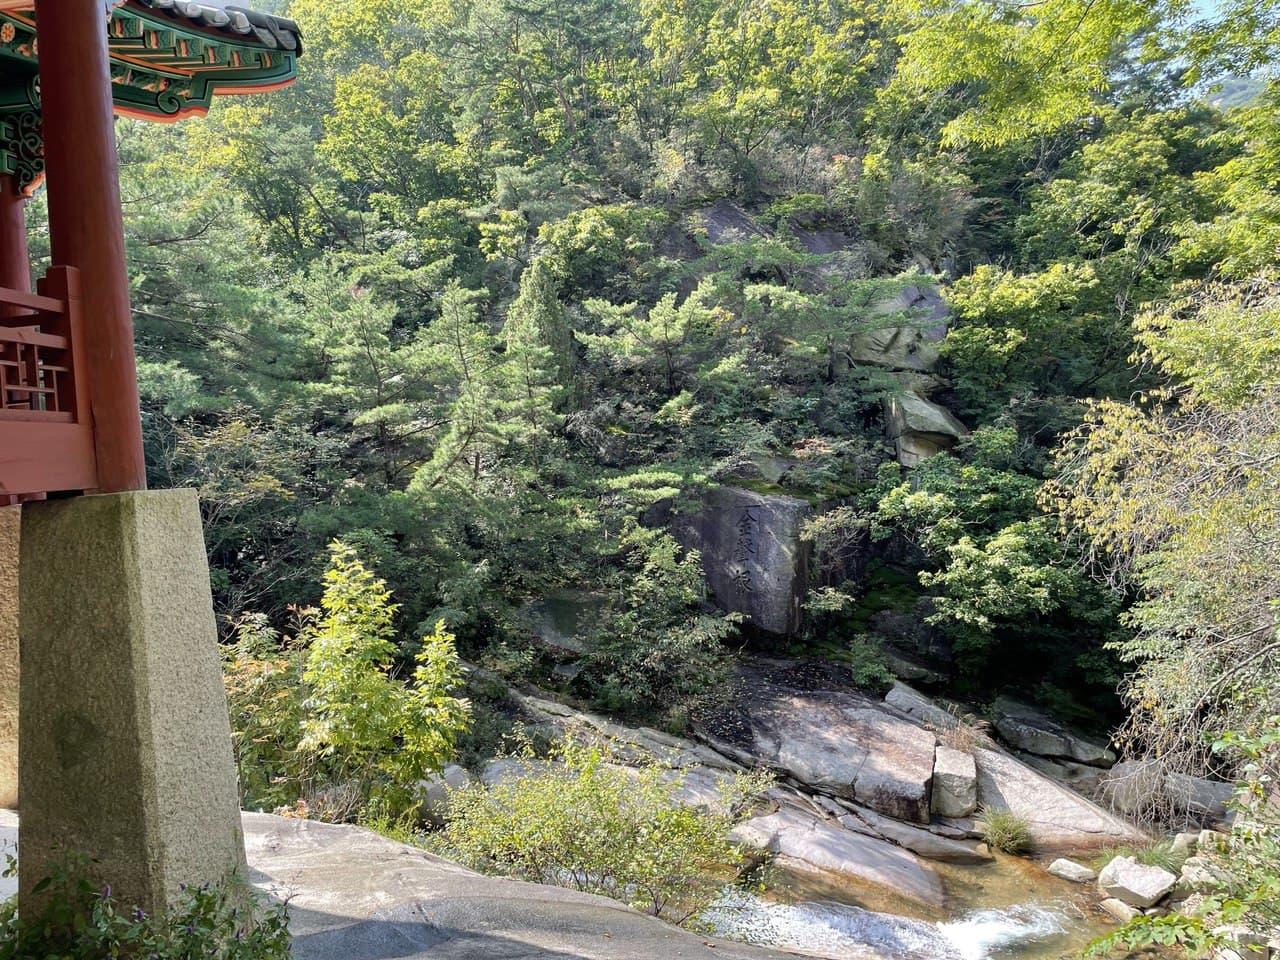

In [97]:
from IPython.display import Image
Image("bukhansan.jpg") 

## C.
I sometimes might use my scheduler if I plan on having my day laid out for me instead of me choosing to go to a certain place by myself. But mostly, I just like my day to be spontaneous and not be rigidly defined bya schedule so, I probably will not use this as much, but it is good to have the option to do so.

## HC Uses:
1. #utility: In defining my priority, I was maximizing my utility In my case, I want to prioritize the tasks that have more dependencies and the ones that take the longest. For other people, they might want to minimize the break time in between tasks and so on. And this is why I was emphasizing the priority calculator is individualized for every person in a way that maximizes their utility.

2. #breakitdown: When tackling this problem, I break down the problem into sub problems that I can focus on at a single time. When I wanted to multi task for example, I focused on how should I get the inpiut, I should I get the task object, how should I manipulate the current time so I'm actually executing them together, and so on.

3. #algorithms: I applied this HC all over the assigfnment, not only in a ceratain place. I used best practices like cmmenting and providing doc strings and I made sure that my program actually produces the schedule like it is supposed to do.